#Mathematical and Bayesian Models

### Demo 1 : Naïve Bayes Classification

In this demo, you will learn how to apply Naive Bayes algorithm in Python using scikit-learn library.

---

## Problem Statement

Given the details of an idividual classify the salary is greater than 50K or not.

---

## Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score
from io import StringIO
import matplotlib.pyplot as plt
%matplotlib inline

---

## Dataset

The dataset contains various details of individuals along with their salary classified either greater than 50K or less.

- __Age__: continuous. 
- __Workclass__: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- __Fnlwgt__: continuous. 
- __Education__: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- __Education-num__: continuous. 
- __Marital-status__: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- __Occupation__: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- __Relationship__: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- __Race__: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- __Sex__: Female, Male. 
- __Capital-gain__: continuous. 
- __Capital-loss__: continuous. 
- __Hours-per-week__: continuous. 
- __Native-country__: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- __Income__: >50K, <=50K.

---
## Data Analysis

In [2]:
income_data=pd.read_csv('income_evaluation.csv')

<div style="background-color:##EDF9FF">
  <ul><li><h3> Checking Data</h3></li></ul>
</div>

In [4]:
income_data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
income_data.shape

(32561, 15)

In [5]:
income_data.corr()

ValueError: could not convert string to float: ' State-gov'

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Number of rows and columns </span>
</div>

In [6]:
income_data.describe(include='O')

,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Native-country,Income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">We can see how many unique values and frquecy of majority values in each categoical column are present.</span>
</div>

In [7]:
income_data.describe()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">We can check standard deviation, mean and other values of all continous columns present in the dataset.</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3>Checking DataType</h3></li></ul>
</div>

In [9]:
income_data.dtypes
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Hours-per-week  32561 non-null  int64 
 13  Native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">We will have to encode the categorical features later</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3> Testing For Null Values</h3></li></ul>
</div>

In [10]:
income_data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Dataset has no null values</span>
</div>

In [11]:
income_data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Dataset has no NA values</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3> Check Distribution Of Target Variable</h3></li></ul>
</div>

In [12]:
Target_ratio=income_data['Income'].value_counts()/len(income_data)
print(Target_ratio)

Income
<=50K    0.75919
>50K     0.24081
Name: count, dtype: float64


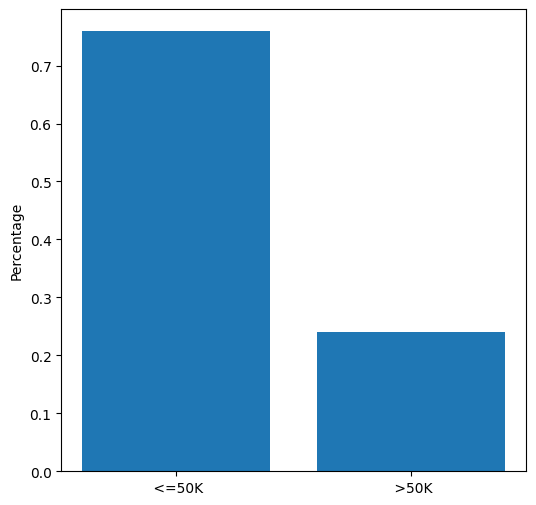

In [13]:
## Checking for data unbalance
plt.figure(figsize = (6,6))
plt.bar(Target_ratio.index,Target_ratio)
plt.ylabel('Percentage')
plt.show()

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Dataset has around 24% of entries where income is >50K</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3>Encode Target Vairable</h3></li></ul>
</div>

In [14]:
lb=LabelEncoder()
income_data.Income=lb.fit_transform(income_data.Income)
print(income_data.Income)

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Income, Length: 32561, dtype: int64


In [15]:
lb.classes_

array([' <=50K', ' >50K'], dtype=object)

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">There are two classes in this dataset</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3> Convert Categorical Features</h3></li></ul>
</div>

In [16]:
cat_features=income_data.columns[income_data.dtypes=='O']
print(*cat_features,sep=' | ') # * is wildcard to print a list, where parameter sep is used to define a separator.

Workclass | Education | Marital-status | Occupation | Relationship | Race | Sex | Native-country


<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">We will perform dummitization on these</span>
</div>

In [17]:
new_data = pd.get_dummies(income_data, columns = cat_features)
print(new_data)

       Age  Fnlwgt  Education-num  Capital-gain  Capital-loss  Hours-per-week  \
0       39   77516             13          2174             0              40   
1       50   83311             13             0             0              13   
2       38  215646              9             0             0              40   
3       53  234721              7             0             0              40   
4       28  338409             13             0             0              40   
...    ...     ...            ...           ...           ...             ...   
32556   27  257302             12             0             0              38   
32557   40  154374              9             0             0              40   
32558   58  151910              9             0             0              40   
32559   22  201490              9             0             0              20   
32560   52  287927              9         15024             0              40   

       Income  Workclass_ ?

In [15]:
new_data.shape

(32561, 109)

In [18]:
new_data.corr()
#corr_with

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Income,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,...,Native-country_ Portugal,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia
Age,1.000000,-0.076646,0.036527,0.077674,5.777454e-02,0.068756,0.234037,0.042627,0.051227,0.060901,...,0.004242,0.008374,0.002583,0.000613,-0.013816,-0.006271,0.004843,0.015917,-1.505357e-02,0.000375
Fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-1.025171e-02,-0.018768,-0.009463,-0.002923,-0.007525,-0.002828,...,-0.013152,0.007164,-0.003790,-0.012365,-0.001252,-0.001250,0.005273,-0.075287,-1.139827e-02,0.005501
Education-num,0.036527,-0.043195,1.000000,0.122630,7.992296e-02,0.148123,0.335154,-0.077946,0.060518,0.097941,...,-0.044286,-0.041269,0.001264,0.016046,0.049472,0.007896,-0.017071,0.101207,-7.483035e-03,-0.001234
Capital-gain,0.077674,0.000432,0.122630,1.000000,-3.161506e-02,0.078409,0.223329,-0.015585,-0.005768,-0.007007,...,-0.003879,-0.006103,-0.001680,0.005323,0.005735,-0.003432,-0.003526,0.004599,-2.564276e-03,-0.002193
Capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000e+00,0.054256,0.150526,-0.016102,0.010798,0.014668,...,-0.007308,-0.004718,-0.004160,0.010114,0.006637,-0.005095,0.008102,0.008784,-5.997599e-07,-0.004804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Native-country_ Thailand,-0.006271,-0.001250,0.007896,-0.003432,-5.095482e-03,0.009537,-0.004078,-0.000085,-0.004099,-0.006164,...,-0.000793,-0.001394,-0.000452,-0.001167,-0.000932,1.000000,-0.000568,-0.068978,-1.067931e-03,-0.000521
Native-country_ Trinadad&Tobago,0.004843,0.005273,-0.017071,-0.003526,8.102329e-03,-0.006006,-0.007660,-0.000393,-0.004212,-0.001148,...,-0.000815,-0.001432,-0.000464,-0.001199,-0.000957,-0.000568,1.000000,-0.070869,-1.097212e-03,-0.000536
Native-country_ United-States,0.015917,-0.075287,0.101207,0.004599,8.783567e-03,0.002446,0.034470,0.006193,0.015441,0.033196,...,-0.098924,-0.173848,-0.056315,-0.145558,-0.116167,-0.068978,-0.070869,1.000000,-1.331803e-01,-0.065031
Native-country_ Vietnam,-0.015054,-0.011398,-0.007483,-0.002564,-5.997599e-07,-0.011379,-0.017649,-0.002286,0.000099,-0.003611,...,-0.001532,-0.002692,-0.000872,-0.002254,-0.001799,-0.001068,-0.001097,-0.133180,1.000000e+00,-0.001007


In [19]:
new_data.head()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Income,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,...,Native-country_ Portugal,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<div style="background-color:##EDF9FF">
  <ul><li><h3>Training And Testing Data</h3></li></ul>
</div>

In [20]:
X=new_data
y=new_data.Income

In [21]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0,test_size=0.3)

---

## Naīve Bayes Training

There are three types of naive bayes in scikit learn:




- <a href='http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.htmlBernoulliNB'>__Bernoulli__</a>: Bernoulli Naīve Bayes is designed for binary/boolean features and discrete data. Key hyperparameters to be considered before training a bayesian model:
    - __alpha__: A float value to determine laplace smoothin parameter which is __1.0__ by default. When set to __0__, no smoothing is present
    - __binarize__: An optional float value which is threshold for binarizing of sample features. If __None__, input data is already considered to have binary features.


- <a href='http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html'>__Gaussian__</a>: Gaussian Naīve Bayes which can be used when target variable is continous and features follow a normal distribution.
    - __var_smoothing__: An optional float value to determine how much portion of largest variance should be added to variances for statbility calculation.


- <a href='http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html '>__Multinomial__</a>: Multinomial Naīve Bayes is used for dicrete counts. Generally, used for text classification.
    - __alpha__: A float value to determine laplace smoothin parameter which is __1.0__ by default. When set to __0__, no smoothing is present.

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Assuming Data to be normally distributed we will apply the gaussian model and the data can also be fit into bernoulli model.</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3>Training Gaussian Naive Bayes</h3></li></ul>
</div>

In [22]:
gaussian_nb=GaussianNB()
gaussian_nb.fit(X_train,y_train)

GaussianNB()

<div style="background-color:##EDF9FF">
  <ul><li><h3>Training Bernoulli Naive Bayes</h3></li></ul>
</div>

In [23]:
bernoulli_nb=BernoulliNB()
bernoulli_nb.fit(X_train,y_train)

BernoulliNB()

---

## Accuracy Score

<div style="background-color:##EDF9FF">
  <ul><li><h3> Gaussian Naive Bayes</h3></li></ul>
</div>

In [24]:
pred=gaussian_nb.predict(X_test)
acc_gnb=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc_gnb)

Accuracy Score:  0.7974204115057836


<div style="background-color:##EDF9FF">
  <ul><li><h3> Bernoulli Naive Bayes</h3></li></ul>
</div>

In [25]:
pred=bernoulli_nb.predict(X_test)
acc_bnb=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc_bnb)

Accuracy Score:  0.9986692599037773


<BarContainer object of 2 artists>

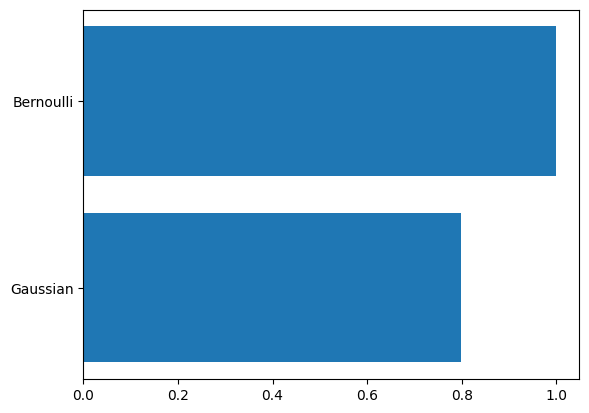

In [26]:
plt.barh(['Gaussian','Bernoulli'],[acc_gnb,acc_bnb])

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">As you can see, Bernoulli has better accuracy than gaussian</span>
</div>